# Assignment 9
### Alexander M. Procton // 4.2.18

For this machine learning assignment, I tried to use train a Gaussian naive Bayes classifier to identify *Accipiter* hawks in the United States by species. Three species of *Accipiter* live in the USA, Cooper's hawk (*A. cooperii*), the northern goshawk (*A. gracilis*), and the sharp-shinned hawk (*A. striatus*). I downloaded GBIF data matching the query "Acciptiter" from 1960 to 2010 and used `scikit-learn` to implement supervised classification.

In [2]:
import numpy as np
import pandas as pd

from records import Records

__1. Download Accipiter records from 1960 to 2010__

In [3]:
# instantiate Records object
data = Records("Accipiter", (1960, 2010))

__2. Clean the data to remove non *Accipiter* specimens and n/a input__

In [17]:
# subset to features and target variables
subset = data.df[data.df['genus'] == 'Accipiter']
subset = subset[['decimalLatitude', 'decimalLongitude', 'species']]

# remove cases with nan
subset = subset.dropna(axis = 0, how = 'any')

__3. Create features and targets for machine learning and split into training and evaluation sets__

In [19]:
# create features matrix with lat, long, and elevation
X = subset.drop('species', axis = 1)

# create target array with species
y = subset['species']

# split X and y into training and test data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)

__4. Run and evaluate model__

In [20]:
# instantiate naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

# fit model and classify Xtest
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.5008130081300813

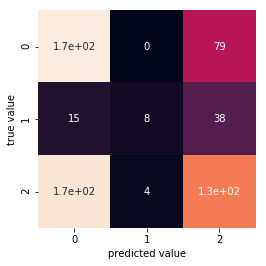

In [25]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

The naive Bayes classifier had trouble distinguishing Cooper's hawks (*A. cooperii*, 0 in figure) and sharp-shinned hawks ((*A. striatus*, 2 in figure) on the basis of latitude and longitude. The goshawk, which tends to live at more northern latitudes, was not well-represented in the dataset, which made it difficult to distinguish from its relatives. These factors contribute to the  low accuracy score of 0.5 (we could almost do as well randomly guessing Cooper's or sharp-shinned on the basis of a coin flip). I had originally hoped to use more features, such as elevation, for this classification, but GBIF categories were limited and many elevation records for *Accipiter* specimens were `nan`.